In [0]:
# 30个并列6786输入， 输出3个百分比  （黑白灰），   数据为  36个train  18个val  18个test

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load1 = np.load('/content/1.npy')
# load2 = np.load('/content/M2.npy')
load1 = np.load('/content/drive/My Drive/input/pre/10.npy')
load2 = np.load('/content/drive/My Drive/output/M2.npy')
load3 = np.load('/content/drive/My Drive/input/post/10.npy')
load4 = np.load('/content/drive/My Drive/input/fu/10.npy')
load5 = np.load('/content/drive/My Drive/output/M3.npy')
load6 = np.load('/content/drive/My Drive/output/M4.npy')
# load4 = np.load('/content/1.npy')
# load5 = np.load('/content/1.npy')
# load6 = np.load('/content/1.npy')
# load7 = np.load('/content/1.npy')
# load8 = np.load('/content/1.npy')
# load9 = np.load('/content/1.npy')
# load10 = np.load('/content/1.npy')

In [0]:
# 1-3 delta 8-10 lowalfa 10-12highalfa 4-7 ceta 13-21beta1 22-30beta2 

In [0]:
def extract_half_of_matrix1(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load1[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

def extract_half_of_matrix3(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load3[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

def extract_half_of_matrix4(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load4[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

In [8]:
New = []
for i in range(24):
    New.append(extract_half_of_matrix1(i))
Load1 = np.array(New)

New3 = []
for i in range(24):
    New3.append(extract_half_of_matrix3(i))
Load3 = np.array(New3)

New4 = []
for i in range(24):
    New4.append(extract_half_of_matrix4(i))
Load4 = np.array(New4)

print(Load1.shape)
print(Load3.shape)
print(Load4.shape)

(24, 30, 6786)
(24, 30, 6786)
(24, 30, 6786)


In [9]:
split = 18
train_data1 = Load1[:split,:,:]   # split patients as training
test_data1 = Load1[split:,:,:]   # 6 as testing
train_data3 = Load3[:split,:,:]   
test_data3 = Load3[split:,:,:]
train_data4 = Load4[:split,:,:]   
test_data4 = Load4[split:,:,:]
# train_data = train_data1 +  train_data3 + train_data4
train_data = np.concatenate((train_data1, train_data3,train_data4), axis=0)  # concatenate all the training instances into one array 
test_data = np.concatenate((test_data1,test_data3,test_data4), axis= 0)
val_split = 36 
Train_data = train_data[:val_split,:,:]
Validation_data = train_data[val_split:,:,:]
print(Train_data.shape)
print(Validation_data.shape)
print(test_data.shape)


(36, 30, 6786)
(18, 30, 6786)
(18, 30, 6786)


In [12]:
C2_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load2[i,j,k] and load2[i,j,k] < '32':
        c2+=1
      if  load2[i,j,k] == '32':
        c3+=1
      if  load2[i,j,k] == '0':
        c1+=1
  C2_percent.append([c1/441,c2/441,c3/441])
C2_percent = np.array(C2_percent)
# print(C2_percent) 

           
C5_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load5[i,j,k] and load5[i,j,k] < '32':
        c2+=1
      if  load5[i,j,k] == '32':
        c3+=1
      if  load5[i,j,k] == '0':
        c1+=1
  C5_percent.append([c1/441,c2/441,c3/441])
C5_percent = np.array(C5_percent)
# print(C5_percent) 


C6_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load6[i,j,k] and load6[i,j,k] < '32':
        c2+=1
      if  load6[i,j,k] == '32':
        c3+=1
      if  load6[i,j,k] == '0':
        c1+=1
  C6_percent.append([c1/441,c2/441,c3/441])
C6_percent = np.array(C6_percent)
# print(C6_percent) 

train_label = C2_percent[:split,:]
test_label= C2_percent[split:,:]
train_label5 = C5_percent[:split,:]
test_label5= C5_percent[split:,:]
train_label6 = C6_percent[:split,:]
test_label6= C6_percent[split:,:]
train_label = np.concatenate((train_label, train_label5,train_label6), axis=0)
test_label = np.concatenate((test_label,test_label5,test_label6), axis=0)  
Train_label = train_label[:val_split,:]
Validation_label = train_label[val_split:,:]
# train_label=np.reshape(train_label, (54, 21*21))
# test_label=np.reshape(test_label, (18, 21*21))
print(Train_label.shape)
print(Validation_label.shape)
print(test_label.shape)


(36, 3)
(18, 3)
(18, 3)


In [0]:
train_data1=Train_data[:,0,:]
train_data2=Train_data[:,1,:]
train_data3=Train_data[:,2,:]
train_data4=Train_data[:,3,:]
train_data5=Train_data[:,4,:]
train_data6=Train_data[:,5,:]
train_data7=Train_data[:,6,:]
train_data8=Train_data[:,7,:]
train_data9=Train_data[:,8,:]
train_data10=Train_data[:,9,:]
train_data11=Train_data[:,10,:]
train_data12=Train_data[:,11,:]
train_data13=Train_data[:,12,:]
train_data14=Train_data[:,13,:]
train_data15=Train_data[:,14,:]
train_data16=Train_data[:,15,:]
train_data17=Train_data[:,16,:]
train_data18=Train_data[:,17,:]
train_data19=Train_data[:,18,:]
train_data20=Train_data[:,19,:]
train_data21=Train_data[:,20,:]
train_data22=Train_data[:,21,:]
train_data23=Train_data[:,22,:]
train_data24=Train_data[:,23,:]
train_data25=Train_data[:,24,:]
train_data26=Train_data[:,25,:]
train_data27=Train_data[:,26,:]
train_data28=Train_data[:,27,:]
train_data29=Train_data[:,28,:]
train_data30=Train_data[:,29,:]



Validation_data1=Validation_data[:,0,:]
Validation_data2=Validation_data[:,1,:]
Validation_data3=Validation_data[:,2,:]
Validation_data4=Validation_data[:,3,:]
Validation_data5=Validation_data[:,4,:]
Validation_data6=Validation_data[:,5,:]
Validation_data7=Validation_data[:,6,:]
Validation_data8=Validation_data[:,7,:]
Validation_data9=Validation_data[:,8,:]
Validation_data10=Validation_data[:,9,:]
Validation_data11=Validation_data[:,10,:]
Validation_data12=Validation_data[:,11,:]
Validation_data13=Validation_data[:,12,:]
Validation_data14=Validation_data[:,13,:]
Validation_data15=Validation_data[:,14,:]
Validation_data16=Validation_data[:,15,:]
Validation_data17=Validation_data[:,16,:]
Validation_data18=Validation_data[:,17,:]
Validation_data19=Validation_data[:,18,:]
Validation_data20=Validation_data[:,19,:]
Validation_data21=Validation_data[:,20,:]
Validation_data22=Validation_data[:,21,:]
Validation_data23=Validation_data[:,22,:]
Validation_data24=Validation_data[:,23,:]
Validation_data25=Validation_data[:,24,:]
Validation_data26=Validation_data[:,25,:]
Validation_data27=Validation_data[:,26,:]
Validation_data28=Validation_data[:,27,:]
Validation_data29=Validation_data[:,28,:]
Validation_data30=Validation_data[:,29,:]

test_data1=test_data[0,0,:].reshape(1,6786)
test_data2=test_data[0,1,:].reshape(1,6786)
test_data3=test_data[0,2,:].reshape(1,6786)
test_data4=test_data[0,3,:].reshape(1,6786)
test_data5=test_data[0,4,:].reshape(1,6786)
test_data6=test_data[0,5,:].reshape(1,6786)
test_data7=test_data[0,6,:].reshape(1,6786)
test_data8=test_data[0,7,:].reshape(1,6786)
test_data9=test_data[0,8,:].reshape(1,6786)
test_data10=test_data[0,9,:].reshape(1,6786)
test_data11=test_data[0,10,:].reshape(1,6786)
test_data12=test_data[0,11,:].reshape(1,6786)
test_data13=test_data[0,12,:].reshape(1,6786)
test_data14=test_data[0,13,:].reshape(1,6786)
test_data15=test_data[0,14,:].reshape(1,6786)
test_data16=test_data[0,15,:].reshape(1,6786)
test_data17=test_data[0,16,:].reshape(1,6786)
test_data18=test_data[0,17,:].reshape(1,6786)
test_data19=test_data[0,18,:].reshape(1,6786)
test_data20=test_data[0,19,:].reshape(1,6786)
test_data21=test_data[0,20,:].reshape(1,6786)
test_data22=test_data[0,21,:].reshape(1,6786)
test_data23=test_data[0,22,:].reshape(1,6786)
test_data24=test_data[0,23,:].reshape(1,6786)
test_data25=test_data[0,24,:].reshape(1,6786)
test_data26=test_data[0,25,:].reshape(1,6786)
test_data27=test_data[0,26,:].reshape(1,6786)
test_data28=test_data[0,27,:].reshape(1,6786)
test_data29=test_data[0,28,:].reshape(1,6786)
test_data30=test_data[0,29,:].reshape(1,6786)

Test_data1=test_data[:,0,:]
Test_data2=test_data[:,1,:]
Test_data3=test_data[:,2,:]
Test_data4=test_data[:,3,:]
Test_data5=test_data[:,4,:]
Test_data6=test_data[:,5,:]
Test_data7=test_data[:,6,:]
Test_data8=test_data[:,7,:]
Test_data9=test_data[:,8,:]
Test_data10=test_data[:,9,:]
Test_data11=test_data[:,10,:]
Test_data12=test_data[:,11,:]
Test_data13=test_data[:,12,:]
Test_data14=test_data[:,13,:]
Test_data15=test_data[:,14,:]
Test_data16=test_data[:,15,:]
Test_data17=test_data[:,16,:]
Test_data18=test_data[:,17,:]
Test_data19=test_data[:,18,:]
Test_data20=test_data[:,19,:]
Test_data21=test_data[:,20,:]
Test_data22=test_data[:,21,:]
Test_data23=test_data[:,22,:]
Test_data24=test_data[:,23,:]
Test_data25=test_data[:,24,:]
Test_data26=test_data[:,25,:]
Test_data27=test_data[:,26,:]
Test_data28=test_data[:,27,:]
Test_data29=test_data[:,28,:]
Test_data30=test_data[:,29,:]



In [14]:
# 第一个unit
IN1 = Input(shape=(6786,))
t1 = Dense(1500,activation = 'relu')(IN1)

# 第个unit
IN2 = Input(shape=(6786,))
t2 = Dense(1500,activation = 'relu')(IN2)


# 第个unit
IN3 = Input(shape=(6786,))
t3 = Dense(1500,activation = 'relu')(IN3)


# 第个unit
IN4 = Input(shape=(6786,))
t4 = Dense(1500,activation = 'relu')(IN4)

# 第个unit
IN5 = Input(shape=(6786,))
t5 = Dense(1500,activation = 'relu')(IN5)


# 第个unit
IN6 = Input(shape=(6786,))
t6 = Dense(1500,activation = 'relu')(IN6)


# 第个unit
IN7 = Input(shape=(6786,))
t7 = Dense(1500,activation = 'relu')(IN7)


# 第个unit
IN8 = Input(shape=(6786,))
t8 = Dense(1500,activation = 'relu')(IN8)


# 第个unit
IN9 = Input(shape=(6786,))
t9 = Dense(1500,activation = 'relu')(IN9)


# 第个unit
IN10 = Input(shape=(6786,))
t10 = Dense(1500,activation = 'relu')(IN10)


# 第个unit
IN11 = Input(shape=(6786,))
t11 = Dense(1500,activation = 'relu')(IN11)


# 第个unit
IN12 = Input(shape=(6786,))
t12 = Dense(1500,activation = 'relu')(IN12)


# 第个unit
IN13 = Input(shape=(6786,))
t13 = Dense(1500,activation = 'relu')(IN13)


# 第个unit
IN14 = Input(shape=(6786,))
t14 = Dense(1500,activation = 'relu')(IN14)


# 第个unit
IN15 = Input(shape=(6786,))
t15 = Dense(1500,activation = 'relu')(IN15)


# 第个unit
IN16 = Input(shape=(6786,))
t16 = Dense(1500,activation = 'relu')(IN16)


# 第个unit
IN17 = Input(shape=(6786,))
t17 = Dense(1500,activation = 'relu')(IN17)


# 第个unit
IN18 = Input(shape=(6786,))
t18 = Dense(1500,activation = 'relu')(IN18)


# 第个unit
IN19 = Input(shape=(6786,))
t19 = Dense(1500,activation = 'relu')(IN19)


# 第个unit
IN20 = Input(shape=(6786,))
t20 = Dense(1500,activation = 'relu')(IN20)


# 第个unit
IN21 = Input(shape=(6786,))
t21 = Dense(1500,activation = 'relu')(IN21)


# 第个unit
IN22 = Input(shape=(6786,))
t22 = Dense(1500,activation = 'relu')(IN22)


# 第个unit
IN23 = Input(shape=(6786,))
t23 = Dense(1500,activation = 'relu')(IN23)


# 第个unit
IN24 = Input(shape=(6786,))
t24 = Dense(1500,activation = 'relu')(IN24)


# 第个unit
IN25 = Input(shape=(6786,))
t25 = Dense(1500,activation = 'relu')(IN25)


# 第个unit
IN26 = Input(shape=(6786,))
t26 = Dense(1500,activation = 'relu')(IN26)


# 第个unit
IN27 = Input(shape=(6786,))
t27 = Dense(1500,activation = 'relu')(IN27)


# 第个unit
IN28 = Input(shape=(6786,))
t28 = Dense(1500,activation = 'relu')(IN28)


# 第个unit
IN29 = Input(shape=(6786,))
t29 = Dense(1500,activation = 'relu')(IN29)


# 第个unit
IN30 = Input(shape=(6786,))
t30 = Dense(1500,activation = 'relu')(IN30)



In [16]:
merge = concatenate([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30])
# merge =  Flatten()(merge)
# M1 = Dense(6786,activation = 'relu')(merge)
# M2 = Dense(3393,activation = 'relu')(M1)
M3 = Dense(700,activation = 'relu')(merge)
M4 = Dense(350,activation = 'relu')(M3)
M5 = Dense(175,activation = 'relu')(M4)
M6 = Dense(80,activation = 'relu')(M5)
M7 = Dense(40,activation = 'relu')(M6)
M8 = Dense(20,activation = 'relu')(M7)
M9 = Dense(10,activation = 'relu')(M8)
M10 = Dense(6,activation = 'relu')(M9)

# M11 = Dense(3,activation = 'softmax')(M10)
M11 = Dense(3)(M10)

model = Model(inputs=[IN1,IN2,IN3,IN4,IN5,IN6,IN7,IN8,IN9,IN10,IN11,IN12,IN13,IN14,IN15,IN16,IN17,IN18,IN19,IN20,IN21,IN22,IN23,IN24,IN25,IN26,IN27,IN28,IN29,IN30], outputs=M11)
from keras.optimizers import RMSprop,Adam
model.compile(optimizer = Adam(lr=0.00001),
              loss = 'mean_squared_error',
              metrics = ['mse'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6786)         0                                            
____________________________________________________________________________________________

In [0]:
TRAIN = [train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7,train_data8,train_data9,train_data10,train_data11,train_data12,train_data13,train_data14,train_data15,train_data16,train_data17,train_data18,train_data19,train_data20,train_data21,train_data22,train_data23,train_data24,train_data25,train_data26,train_data27,train_data28,train_data29,train_data30]
VALIDATION =  [Validation_data1,Validation_data2,Validation_data3,Validation_data4,Validation_data5,Validation_data6,Validation_data7,Validation_data8,Validation_data9,Validation_data10,Validation_data11,Validation_data12,Validation_data13,Validation_data14,Validation_data15,Validation_data16,Validation_data17,Validation_data18,Validation_data19,Validation_data20,Validation_data21,Validation_data22,Validation_data23,Validation_data24,Validation_data25,Validation_data26,Validation_data27,Validation_data28,Validation_data29,Validation_data30]
TEST = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30]




In [18]:
history = model.fit(TRAIN, Train_label, epochs=100, validation_data = (VALIDATION,Validation_label))




Train on 36 samples, validate on 18 samples
Epoch 1/100





36/36 [==============================] - 15s 428ms/step - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 5/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0244 - val_mean_s

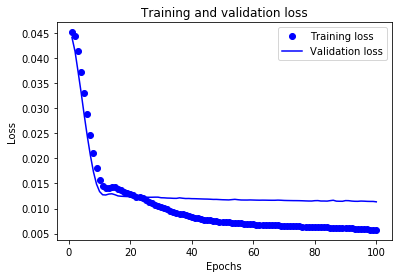

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mean_squared_error']
val_mse=history.history['val_mean_squared_error']
epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

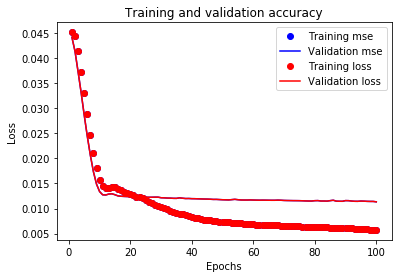

In [22]:
plt.clf()

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
TEST = [Test_data1,Test_data2,Test_data3,Test_data4,Test_data5,Test_data6,Test_data7,Test_data8,Test_data9,Test_data10,Test_data11,Test_data12,Test_data13,Test_data14,Test_data15,Test_data16,Test_data17,Test_data18,Test_data19,Test_data20,Test_data21,Test_data22,Test_data23,Test_data24,Test_data25,Test_data26,Test_data27,Test_data28,Test_data29,Test_data30]


History = model.evaluate(x=TEST, y =test_label)  #用18组test data    Returns the loss value & metrics values for the model in test mode. 
print(History)

18/18 [==============================] - 0s 2ms/step
[0.026763545349240303, 0.026763545349240303]


In [25]:
#  model.predict(x = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30])
newx = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30]


model.predict(newx)  #只取一个data做test 


array([[0.27031055, 0.13213933, 0.5975501 ]], dtype=float32)

In [27]:
print(test_label[0])

[0.38548753 0.03628118 0.57823129]
